In [1]:
import numpy as np

In [2]:
def init_layer_size(X,Y):
    
    n_x = X.shape[0]
    n_h = 5
    n_y = Y.shape[0]
    
    return (n_x,n_h,n_y)

In [3]:
def init_params(n_x,n_h,n_y):
    
    W1 = np.random.randn(n_h,n_x)*0.1
    b1 = np.zeros(shape=(n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.1
    b2 = np.zeros(shape=(n_y,1))

    params = {'W1':W1,'b1':b1,'W2':W2,'b2':b2}
    return params
    

In [4]:
def foward_prop(X,params):
    
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = 1/(1+np.exp(-Z2))
    
    cache = {'Z1':Z1,'Z2':Z2,'A1':A1,'A2':A2}
    
    return cache

In [5]:
def compute_cost(A2,Y):
    m = Y.shape[0]
    cost = (-1/m)*np.sum(Y*np.log(A2) + (1-Y)*np.log(1-A2))
    return np.squeeze(cost)

In [6]:
def backward_pass(X,Y,cache,params):
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    W1 = params['W1']
    W2 = params['W2']
    
    m = Y.shape[0]
    
    dZ2 = A2 - Y
    dW2 = (1/m)*np.dot(dZ2,A2.T)
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)
    
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    return grads
    

In [7]:
def gradient_descent(params,grads,learning_rate):
    
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    params = {'W1':W1,'b1':b1,'W2':W2,'b2':b2}
    return params

In [8]:
X  = np.array([[i/100] for i in range(1,100)])
Y  = np.array([[i%2] for i in range(1,100)])

X = X.T
Y = Y.T

In [9]:
n_x,n_h,n_y = init_layer_size(X,Y)

In [10]:
params = init_params(n_x,n_h,n_y)

In [11]:
costs = []
epochs = 15000

for i in range(epochs):
    cache = foward_prop(X,params)
    A2 = cache['A2']
    cost = compute_cost(A2,Y)
    costs.append(cost)
    grads = backward_pass(X,Y,cache,params)
    params = gradient_descent(params,grads,learning_rate=0.1) 
    
    if i%1000 == 0:
        print(cost)
        #print(A2)

68.6182926067464
68.61656743894494
68.61653991628988
68.61653099059541
68.61652732668061
68.61652541192292
68.61652418386139
68.61652329251865
68.6165226080386
68.61652207203286
68.61652165117309
68.61652132222571
68.61652106703193
68.61652087072
68.6165207209817


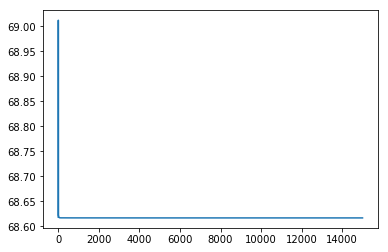

In [12]:
import matplotlib.pyplot as plt

plt.plot(costs)
plt.show()

In [13]:
def predict(parameters, X):
    cache = foward_prop(X, parameters)
    predictions = np.round(cache['A2'])
    return predictions

In [14]:
# Print accuracy
predictions = predict(params, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 50%


In [15]:
X = np.array([[100/500]])
predict(params, X.T)

array([[1.]])

In [16]:
X = np.array([[17/100]])
predict(params, X.T)

array([[1.]])